In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Charger le dataset

In [5]:
file_path = "e_learning_dataset_with_course_names.csv"

In [6]:
df = pd.read_csv(file_path)

In [7]:
# 1️⃣ Aperçu des données
print("Aperçu du dataset :")
print(df.head())  # Afficher les 5 premières lignes
print("\nInfos sur les données :")
print(df.info())  # Vérifier les types et valeurs manquantes
print("\nStatistiques descriptives :")
print(df.describe())  # Statistiques sur les variables numériques

Aperçu du dataset :
   UserID                                       CourseName  SessionDuration  \
0  user_1                     Team-oriented tangible array               47   
1  user_2              Proactive demand-driven open system               36   
2  user_3           Re-contextualized encompassing project               71   
3  user_4  Right-sized object-oriented process improvement               73   
4  user_5        Team-oriented heuristic Graphic Interface               36   

   SessionsPerWeek  CourseCompletion  UserSatisfaction  SignUpDate  \
0                8                 0                 3  2023-12-07   
1                1                 0                 3  2023-04-02   
2                4                 1                 3  2023-11-29   
3                4                 0                 4  2023-07-07   
4                1                 1                 4  2023-06-12   

  LastActiveDate  QuizScores                              FeedbackComments  
0     2

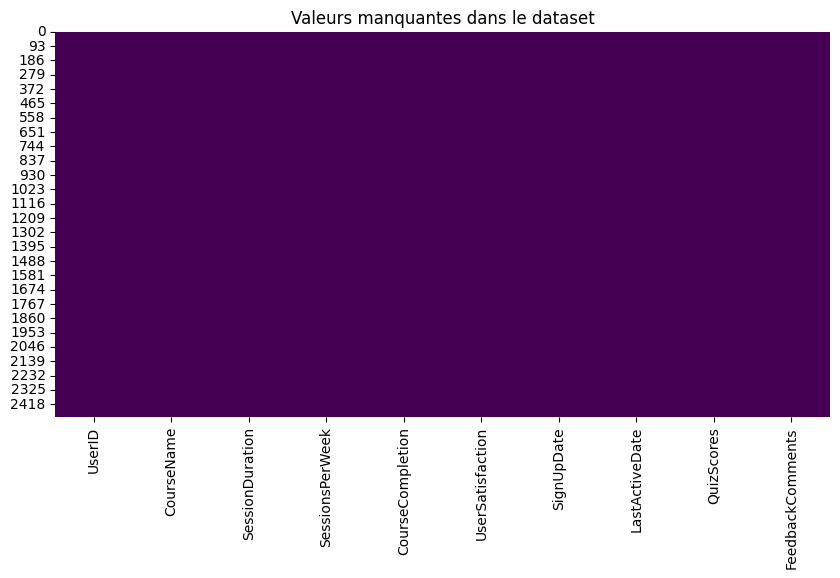

In [8]:
# 2️⃣ Visualisation des valeurs manquantes
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valeurs manquantes dans le dataset")
plt.show()

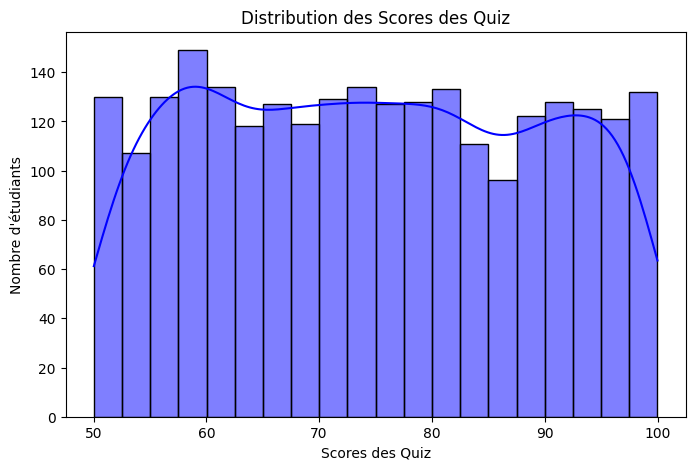

In [9]:
# 3️⃣ Histogramme des scores des quiz
plt.figure(figsize=(8,5))
sns.histplot(df["QuizScores"], bins=20, kde=True, color="blue")
plt.xlabel("Scores des Quiz")
plt.ylabel("Nombre d'étudiants")
plt.title("Distribution des Scores des Quiz")
plt.show()

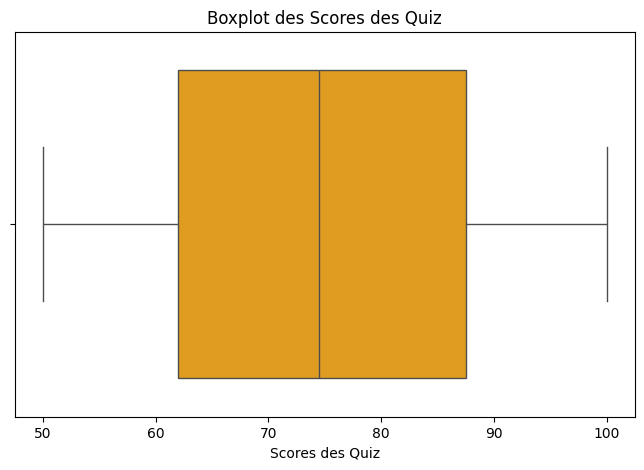

In [10]:
# 4️⃣ Boxplot des scores des quiz pour détecter les outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["QuizScores"], color="orange")
plt.xlabel("Scores des Quiz")
plt.title("Boxplot des Scores des Quiz")
plt.show()

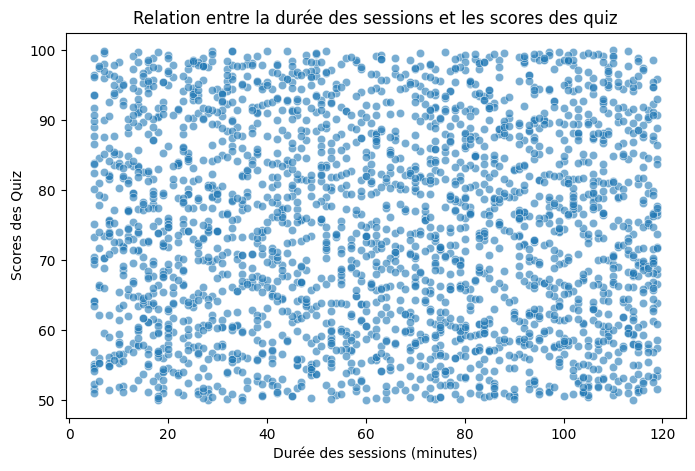

In [11]:
# 6️⃣ Scatter plot entre le temps passé sur la plateforme et le score du quiz
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["SessionDuration"], y=df["QuizScores"], alpha=0.6)
plt.xlabel("Durée des sessions (minutes)")
plt.ylabel("Scores des Quiz")
plt.title("Relation entre la durée des sessions et les scores des quiz")
plt.show()

Vérification des valeurs manquantes et doublons

In [12]:
print("Valeurs manquantes :\n", df.isnull().sum())

Valeurs manquantes :
 UserID              0
CourseName          0
SessionDuration     0
SessionsPerWeek     0
CourseCompletion    0
UserSatisfaction    0
SignUpDate          0
LastActiveDate      0
QuizScores          0
FeedbackComments    0
dtype: int64


In [13]:
print("\nDoublons :", df.duplicated().sum())


Doublons : 0


Conversion des dates

In [14]:
df["SignUpDate"] = pd.to_datetime(df["SignUpDate"], errors="coerce")

In [15]:
df["LastActiveDate"] = pd.to_datetime(df["LastActiveDate"], errors="coerce")


Suppression des colonnes inutiles

In [16]:
df_cleaned = df.drop(columns=["FeedbackComments"])


Création d'une colonne binaire pour la performance des quiz

In [17]:
df_cleaned["QuizPerformance"] = (df_cleaned["QuizScores"] >= 75).astype(int)


Sauvegarde du dataset nettoyé

In [18]:
df_cleaned.to_csv("cleaned_e_learning_dataset.csv", index=False)

In [19]:
print("Fichier nettoyé sauvegardé sous 'cleaned_e_learning_dataset.csv'")


Fichier nettoyé sauvegardé sous 'cleaned_e_learning_dataset.csv'


In [20]:
df.columns

Index(['UserID', 'CourseName', 'SessionDuration', 'SessionsPerWeek',
       'CourseCompletion', 'UserSatisfaction', 'SignUpDate', 'LastActiveDate',
       'QuizScores', 'FeedbackComments'],
      dtype='object')

In [21]:
df.head()

,UserID,CourseName,SessionDuration,SessionsPerWeek,CourseCompletion,UserSatisfaction,SignUpDate,LastActiveDate,QuizScores,FeedbackComments
0,user_1,Team-oriented tangible array,47,8,0,3,2023-12-07,2024-04-27,86.093897,Concern near range direction message window.
1,user_2,Proactive demand-driven open system,36,1,0,3,2023-04-02,2024-05-17,52.788174,Card paper able debate.
2,user_3,Re-contextualized encompassing project,71,4,1,3,2023-11-29,2024-03-28,94.891291,Treatment difference thank.
3,user_4,Right-sized object-oriented process improvement,73,4,0,4,2023-07-07,2024-05-18,85.986530,Long its benefit fall from evidence body.
4,user_5,Team-oriented heuristic Graphic Interface,36,1,1,4,2023-06-12,2024-01-16,66.933203,Central stage grow senior.


In [22]:
df.tail()

,UserID,CourseName,SessionDuration,SessionsPerWeek,CourseCompletion,UserSatisfaction,SignUpDate,LastActiveDate,QuizScores,FeedbackComments
2495,user_2496,Expanded zero administration structure,8,6,1,1,2023-01-19,2024-02-07,54.867287,However fish walk vote simple.
2496,user_2497,Adaptive system-worthy paradigm,112,8,0,3,2023-10-19,2024-04-07,57.526502,Beat imagine middle store.
2497,user_2498,Profound static encryption,63,8,1,4,2023-07-29,2024-06-03,54.156863,Spring soon occur candidate writer hope.
2498,user_2499,Re-contextualized encompassing project,55,9,1,1,2023-07-08,2024-03-25,94.725978,Guy million magazine face.
2499,user_2500,Self-enabling object-oriented process improvement,60,5,1,5,2023-08-10,2024-06-08,81.978978,Item subject president method main know.


In [23]:
df.describe()

,SessionDuration,SessionsPerWeek,CourseCompletion,UserSatisfaction,SignUpDate,LastActiveDate,QuizScores
count,2500.00000,2500.000000,2500.0000,2500.000000,2500,2500,2500.000000
mean,63.01000,4.946000,0.4996,2.958800,2023-06-28 17:06:25.920000,2024-03-23 22:41:05.280000,74.789555
min,5.00000,1.000000,0.0000,1.000000,2023-01-01 00:00:00,2024-01-01 00:00:00,50.027626
25%,33.00000,3.000000,0.0000,2.000000,2023-03-30 00:00:00,2024-02-12 00:00:00,61.995844
50%,64.00000,5.000000,0.0000,3.000000,2023-06-25 12:00:00,2024-03-25 00:00:00,74.479448
75%,92.00000,7.000000,1.0000,4.000000,2023-09-28 00:00:00,2024-05-04 00:00:00,87.555204
max,119.00000,9.000000,1.0000,5.000000,2023-12-31 00:00:00,2024-06-13 00:00:00,99.996826
std,33.50123,2.562208,0.5001,1.406661,NaN,NaN,14.434810


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   UserID            2500 non-null   object        
 1   CourseName        2500 non-null   object        
 2   SessionDuration   2500 non-null   int64         
 3   SessionsPerWeek   2500 non-null   int64         
 4   CourseCompletion  2500 non-null   int64         
 5   UserSatisfaction  2500 non-null   int64         
 6   SignUpDate        2500 non-null   datetime64[ns]
 7   LastActiveDate    2500 non-null   datetime64[ns]
 8   QuizScores        2500 non-null   float64       
 9   FeedbackComments  2500 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 195.4+ KB


Détection des outliers avec la méthode IQR


In [25]:
Q1 = df_cleaned["QuizScores"].quantile(0.25)
Q3 = df_cleaned["QuizScores"].quantile(0.75)
IQR = Q3 - Q1

Définition des bornes pour détecter les outliers


In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


Filtrer les outliers


In [27]:
outliers = df_cleaned[(df_cleaned["QuizScores"] < lower_bound) | (df_cleaned["QuizScores"] > upper_bound)]


Nombre d'outliers détectés

In [28]:
num_outliers = outliers.shape[0]


Afficher quelques outliers si présents

In [29]:
outliers.head(), num_outliers

(Empty DataFrame
 Columns: [UserID, CourseName, SessionDuration, SessionsPerWeek, CourseCompletion, UserSatisfaction, SignUpDate, LastActiveDate, QuizScores, QuizPerformance]
 Index: [],
 0)

histogramme des scores des quiz

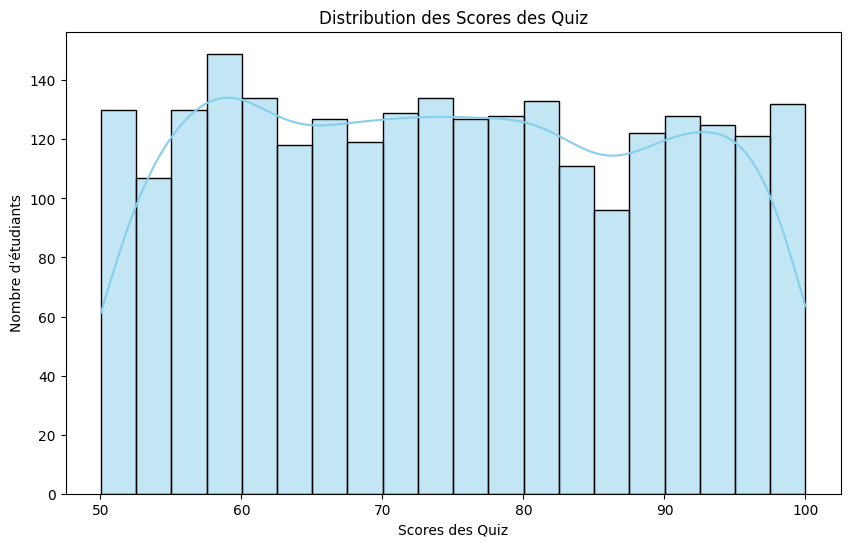

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["QuizScores"], bins=20, kde=True, color="skyblue")
plt.xlabel("Scores des Quiz")
plt.ylabel("Nombre d'étudiants")
plt.title("Distribution des Scores des Quiz")
plt.show()

Charger le dataset nettoyé

In [31]:
df_cleaned = pd.read_csv("cleaned_e_learning_dataset.csv")

Transformation des scores en catégories

In [32]:
def categorize_score(score):
    if score < 65:
        return 0  # Bad
    else:
        return 1  # Good

<ipython-input-33-f36a233f79e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned["QuizCategory"].astype(str), palette=palette)


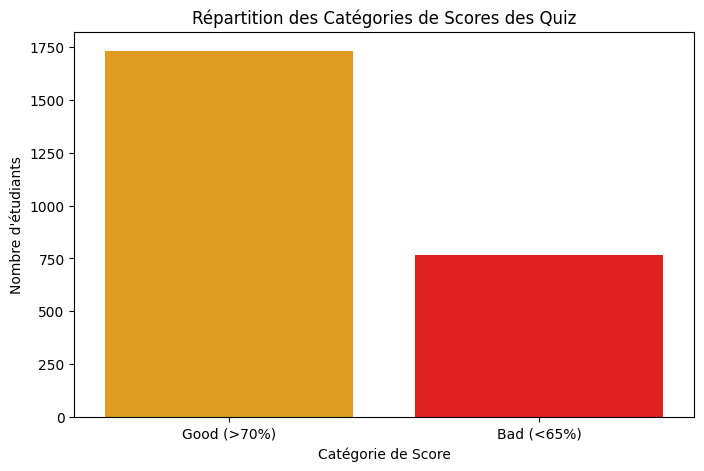

In [33]:
df_cleaned["QuizCategory"] = df_cleaned["QuizScores"].apply(categorize_score)
# Définir une palette de couleurs pour les catégories
# Use string keys for the palette to match the converted QuizCategory values
palette = {'0': "red", '1': "orange"}

# Tracer la distribution des catégories de scores
plt.figure(figsize=(8,5))
# No need to convert to integers, keep as strings
sns.countplot(x=df_cleaned["QuizCategory"].astype(str), palette=palette)
plt.xlabel("Catégorie de Score")
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition des Catégories de Scores des Quiz")
plt.xticks(ticks=['0','1'], labels=["Bad (<65%)", "Good (>70%)"]) # Update ticks to strings
plt.show()

Sélection des features et du label

In [34]:
X = df_cleaned[["SessionDuration", "SessionsPerWeek", "CourseCompletion", "UserSatisfaction"]]
y = df_cleaned["QuizCategory"]

Normalisation des données

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en train/test (80% train, 20% test)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Modèle KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Modèle SVM

In [38]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Modèle ANN (MLP)

In [39]:
ann = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

Comparaison des performances

In [40]:
models = {"KNN": y_pred_knn, "SVM": y_pred_svm, "ANN": y_pred_ann}


Matrice de confusion


=== KNN Model ===
Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.13      0.17       145
           1       0.70      0.82      0.76       355

    accuracy                           0.62       500
   macro avg       0.47      0.48      0.46       500
weighted avg       0.56      0.62      0.58       500



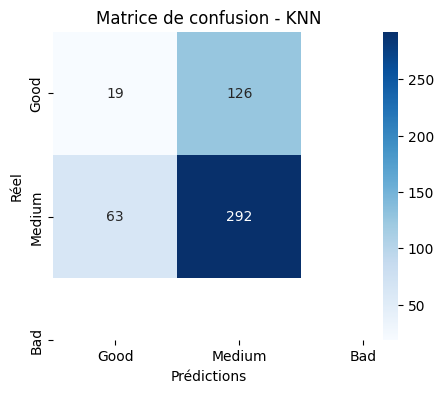


=== SVM Model ===
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.71      1.00      0.83       355

    accuracy                           0.71       500
   macro avg       0.35      0.50      0.42       500
weighted avg       0.50      0.71      0.59       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


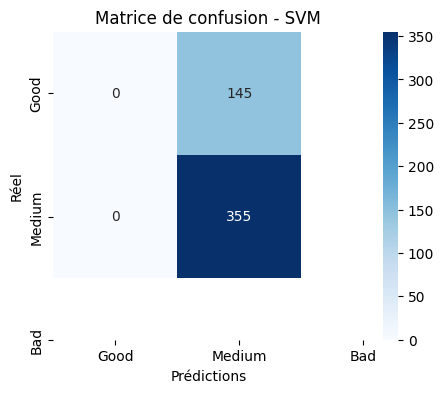


=== ANN Model ===
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.71      1.00      0.83       355

    accuracy                           0.71       500
   macro avg       0.35      0.50      0.42       500
weighted avg       0.50      0.71      0.59       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


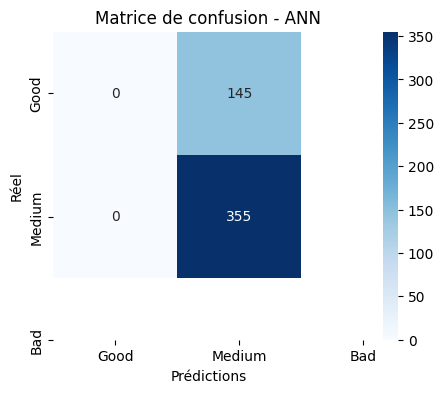

In [41]:
for name, y_pred in models.items():
    print(f"\n=== {name} Model ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Medium", "Bad"], yticklabels=["Good", "Medium", "Bad"])
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.title(f"Matrice de confusion - {name}")
    plt.show()

<ipython-input-42-8139d42c83ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["QuizCategory"], y=df_cleaned["QuizScores"], palette=palette)


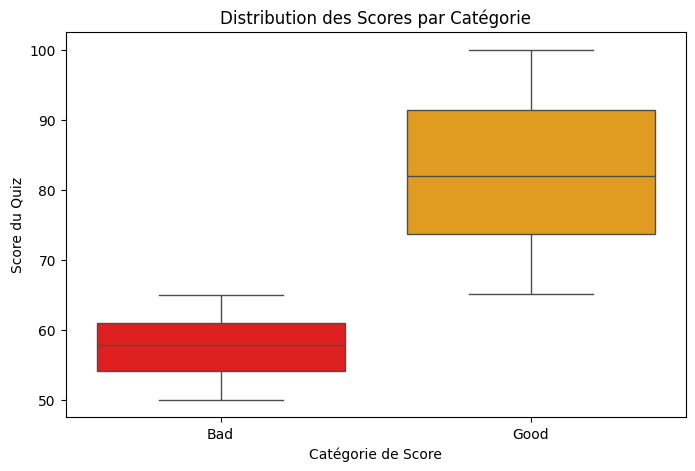

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["QuizCategory"], y=df_cleaned["QuizScores"], palette=palette)
plt.xlabel("Catégorie de Score")
plt.ylabel("Score du Quiz")
plt.title("Distribution des Scores par Catégorie")
plt.xticks(ticks=[0,1], labels=["Bad", "Good"])
plt.show()


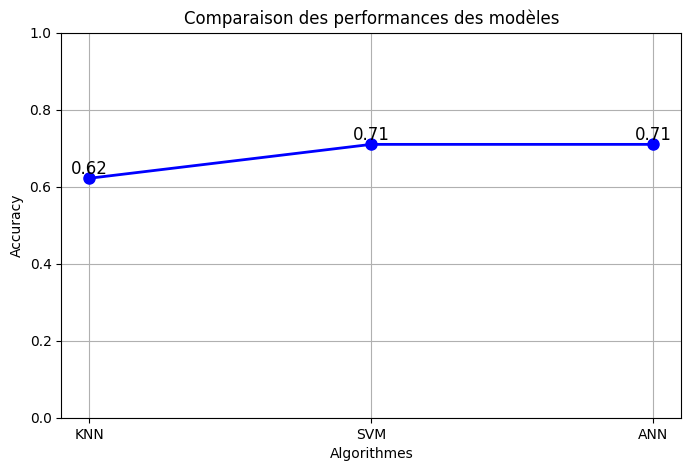

In [43]:
# Stocker les accuracy des modèles
models_accuracy = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "ANN": accuracy_score(y_test, y_pred_ann)
}

# Tracer le graphique en ligne
plt.figure(figsize=(8,5))
plt.plot(models_accuracy.keys(), models_accuracy.values(), marker="o", linestyle="-", color="b", linewidth=2, markersize=8)

# Ajouter des labels et un titre
plt.xlabel("Algorithmes")
plt.ylabel("Accuracy")
plt.title("Comparaison des performances des modèles")
plt.ylim(0, 1)  # Limiter l'axe des y entre 0 et 1
plt.grid(True)

# Afficher les valeurs des points
for model, acc in models_accuracy.items():
    plt.text(model, acc, f"{acc:.2f}", fontsize=12, ha="center", va="bottom")

plt.show()

In [44]:
print(y_train.value_counts())


QuizCategory
1    1377
0     623
Name: count, dtype: int64


In [45]:
print(df['QuizScores'].value_counts())


QuizScores
81.978978    1
86.093897    1
52.788174    1
94.891291    1
93.233251    1
            ..
95.710581    1
84.638032    1
59.585198    1
77.713423    1
66.933203    1
Name: count, Length: 2500, dtype: int64


In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [47]:
features_good = [[110, 9, 1.0, 5.0]]    # Good student
print("Good prediction:", ann.predict(scaler.transform(features_good)))

Good prediction: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
features_medium = [[45, 4, 0.6, 3.0]]  # Medium student
print("Medium prediction:", ann.predict(scaler.transform(features_medium)))


Medium prediction: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Feature importances:", rf.feature_importances_)

Feature importances: [0.68325172 0.17990945 0.02471873 0.1121201 ]


In [50]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_resampled, y_resampled)  # Use the balanced data


SVC(kernel='linear')

In [51]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [52]:
import joblib
joblib.dump(ann, 'model.pkl')

['model.pkl']

In [53]:
from google.colab import files
#files.download('model.pkl')

In [54]:
print(y.value_counts())


QuizCategory
1    1732
0     768
Name: count, dtype: int64


In [55]:
print(X.describe())


       SessionDuration  SessionsPerWeek  CourseCompletion  UserSatisfaction
count       2500.00000      2500.000000         2500.0000       2500.000000
mean          63.01000         4.946000            0.4996          2.958800
std           33.50123         2.562208            0.5001          1.406661
min            5.00000         1.000000            0.0000          1.000000
25%           33.00000         3.000000            0.0000          2.000000
50%           64.00000         5.000000            0.0000          3.000000
75%           92.00000         7.000000            1.0000          4.000000
max          119.00000         9.000000            1.0000          5.000000
